In [15]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
def plot(
    player_type: str,
    log_dir: str,
    model_name: str,
    game_type: str,
    game_settings_type: str,
    ax: plt.Axes
):
    directory = os.path.join(log_dir, model_name, game_type, game_settings_type)

    wins, losses, ties, xlabels = [], [], [], []
    for dir in sorted(
        os.listdir(directory),
        key=lambda x: int(x.split('_')[-1])  # Extract the iteration number
    ):
        info = json.load(open(os.path.join(directory, dir, 'game.json')))
        player_types = [info[f"player_{i}_player_type"] for i in range(2)]
        player_idx = -1
        if player_type in player_types:
            player_idx = player_types.index(player_type)
        else:
            continue
        player_rates = info[f"player_{player_idx}_rates"]
        wins.append(player_rates['win'])
        losses.append(player_rates['loss'])
        ties.append(player_rates['tie'])
        xlabels.append(info[f"player_{1-player_idx}_player_type"])

    df = pd.DataFrame({
        'win': wins,
        'loss': losses,
        'tie': ties
    })
    df.plot(kind='bar', stacked=True, ax=ax)
    ax.set_title(f"{model_name}: {game_settings_type}")
    ax.set_xlabel("Opponent player type")
    ax.set_ylabel(f"\"{player_type}\" player type rates")
    ax.legend(title="Game result")
    # Set x-axis labels
    ax.set_xticks(range(len(xlabels)))
    ax.set_xticklabels(xlabels, rotation=45, ha='right')  # Rotate for better visibility


In [17]:
def plot_group(player_type : str, log_source : str):
    fig, axs = plt.subplots(2, 2, figsize=(16, 16))

    plot(player_type, log_source, "Claude 3.5 Sonnet v2", "rps", "eq1", axs[0, 0])
    plot(player_type, log_source, "Claude 3.5 Sonnet v2", "rps", "p3", axs[0, 1])
    plot(player_type, log_source, "Llama 3.3 70B Instruct", "rps", "eq1", axs[1, 0])
    plot(player_type, log_source, "Llama 3.3 70B Instruct", "rps", "p3", axs[1, 1])
    plt.tight_layout()

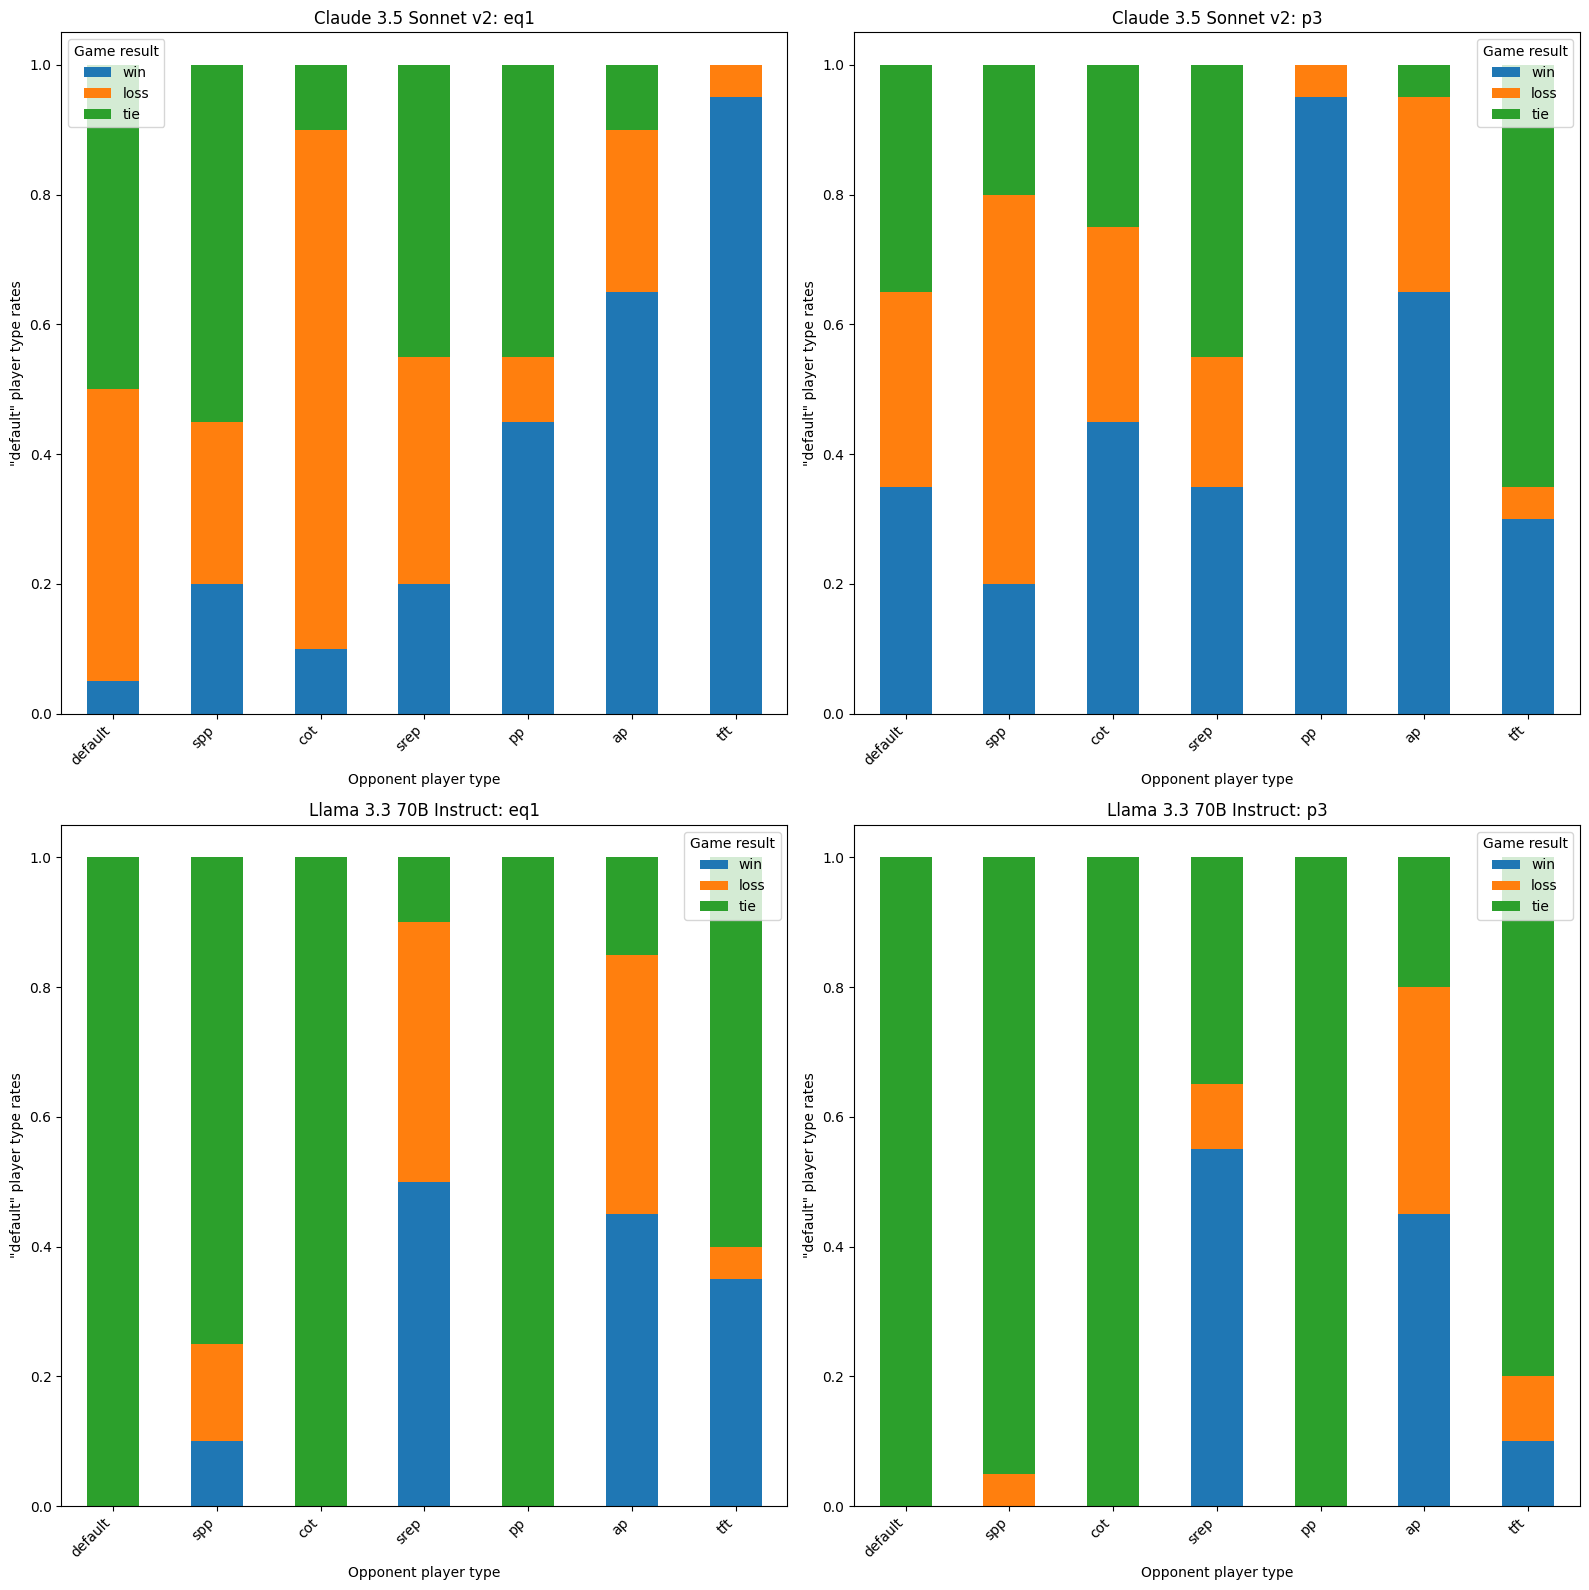

In [18]:
plot_group("default", "logs")

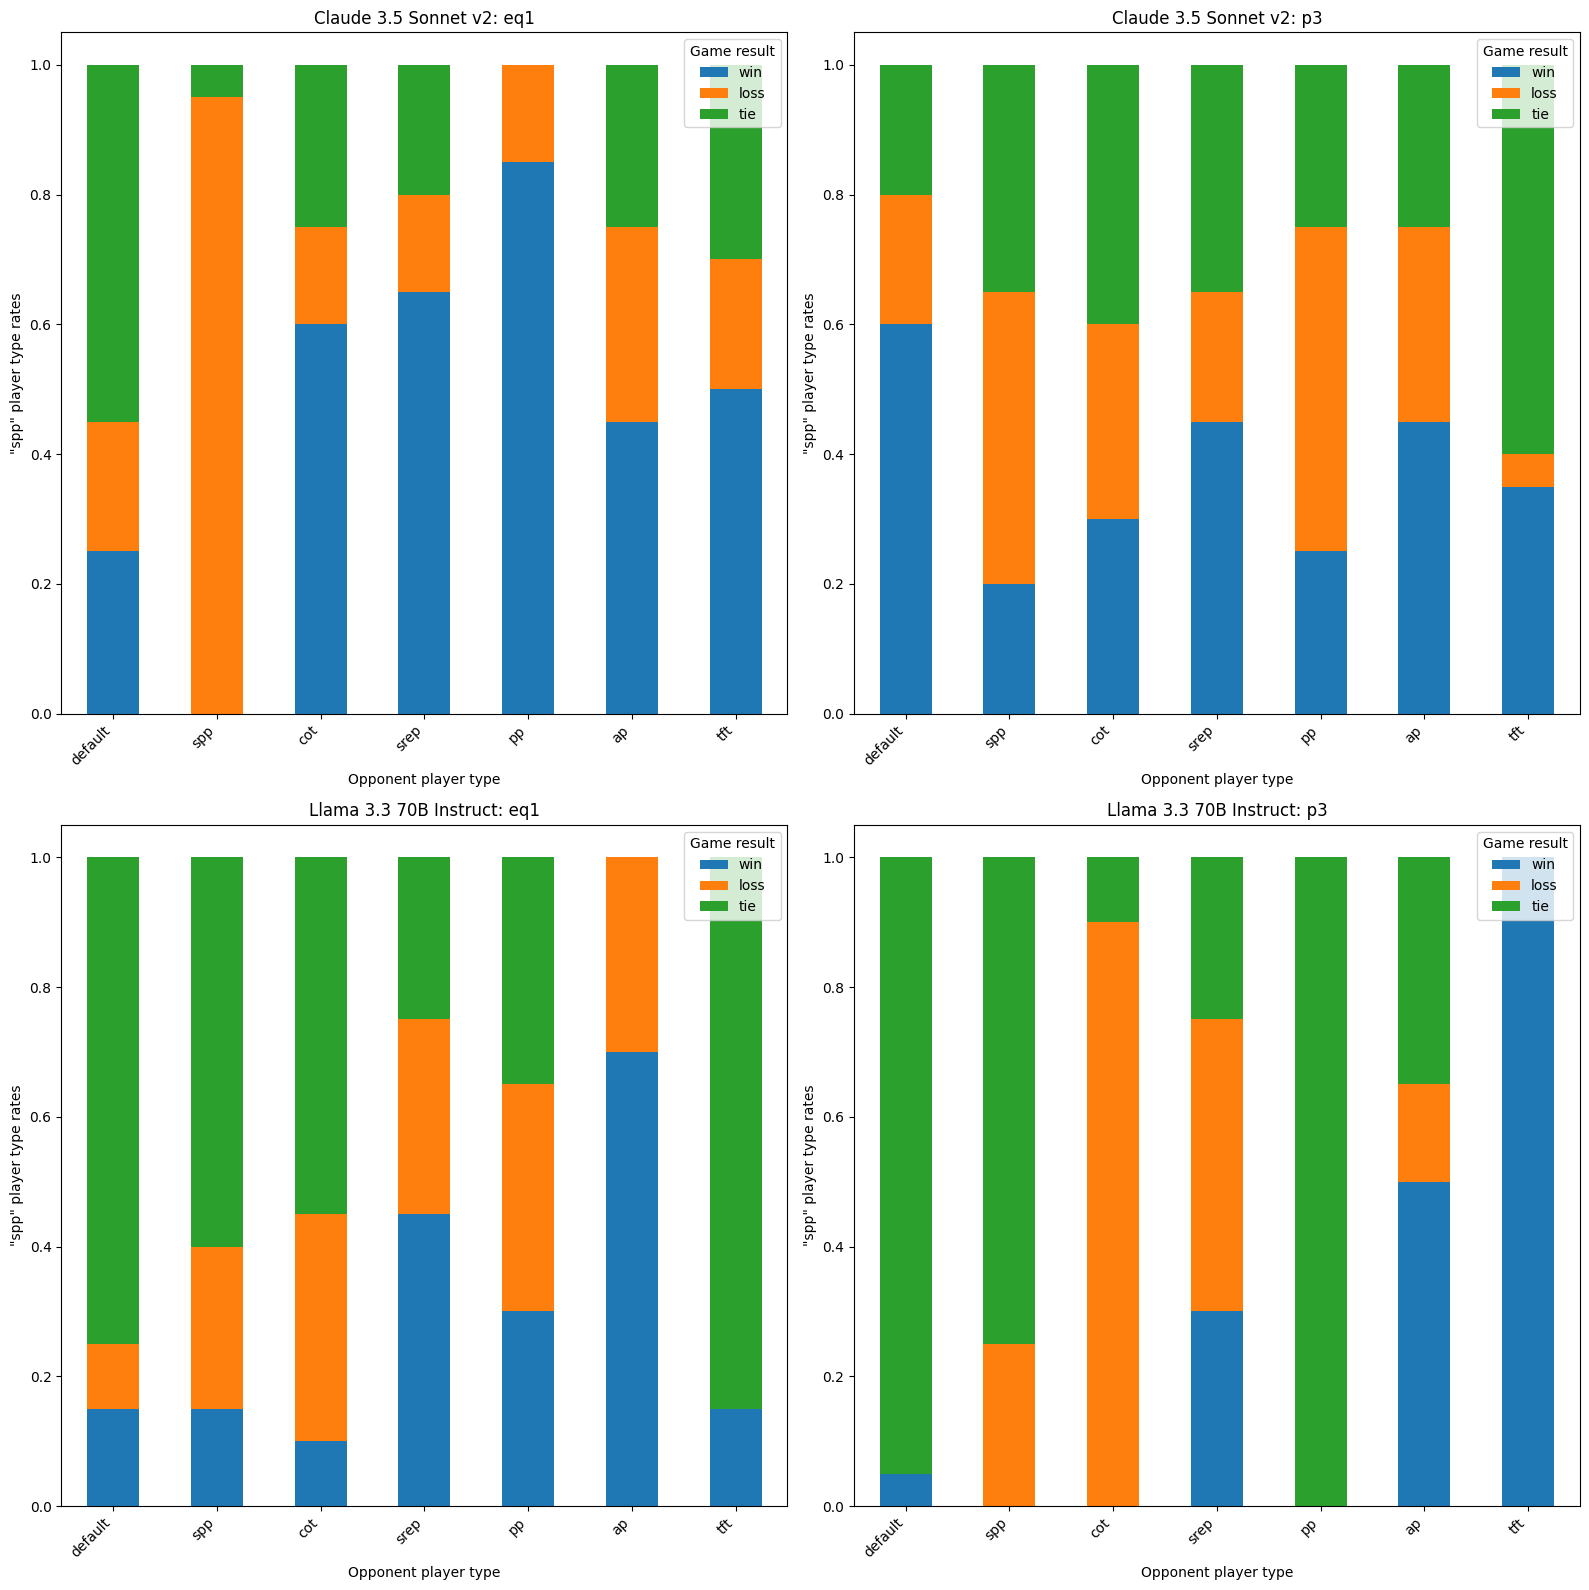

In [19]:
plot_group("spp", "logs")

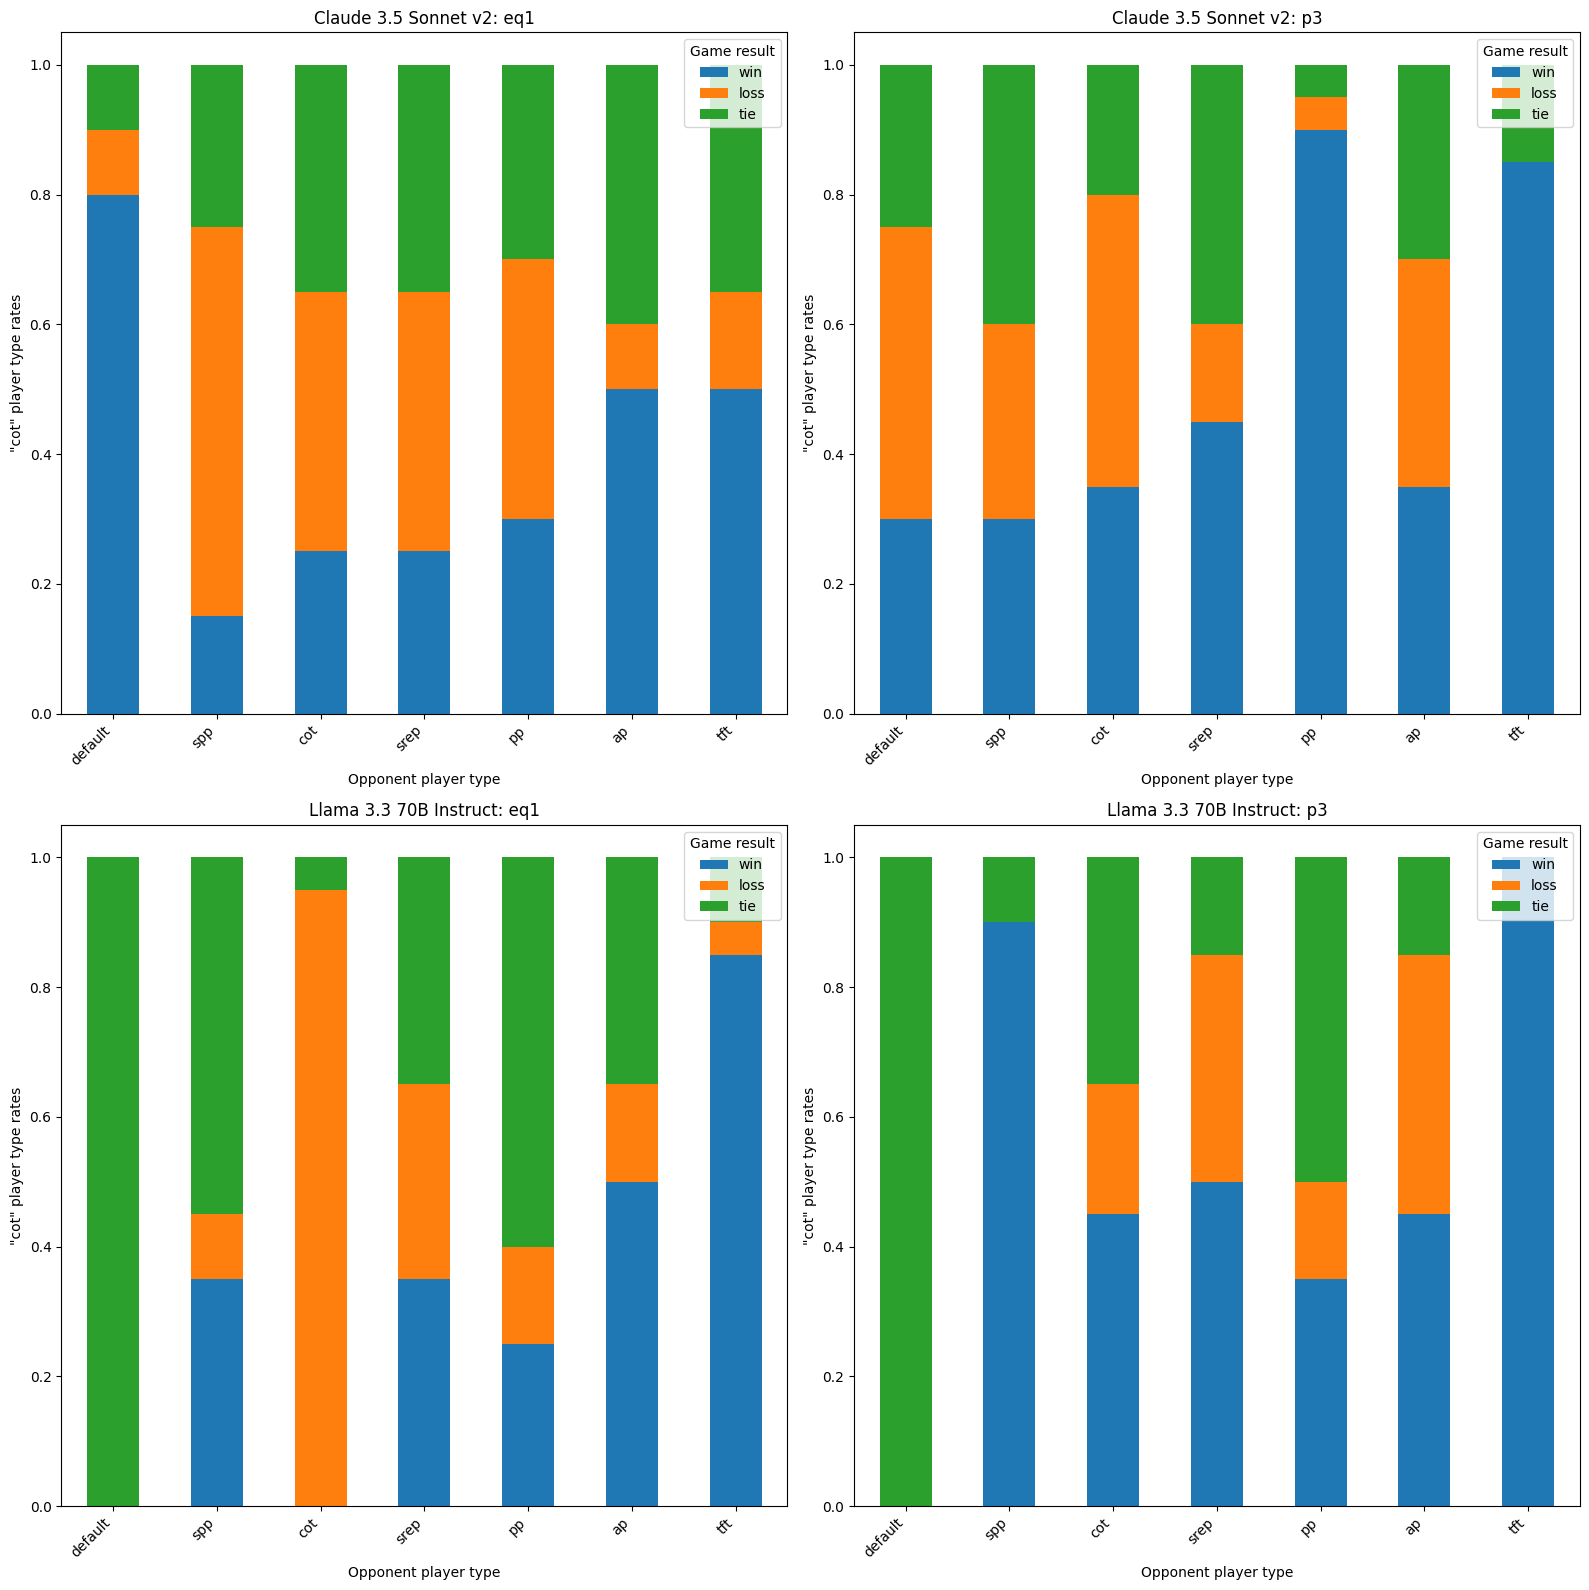

In [20]:
plot_group("cot", "logs")

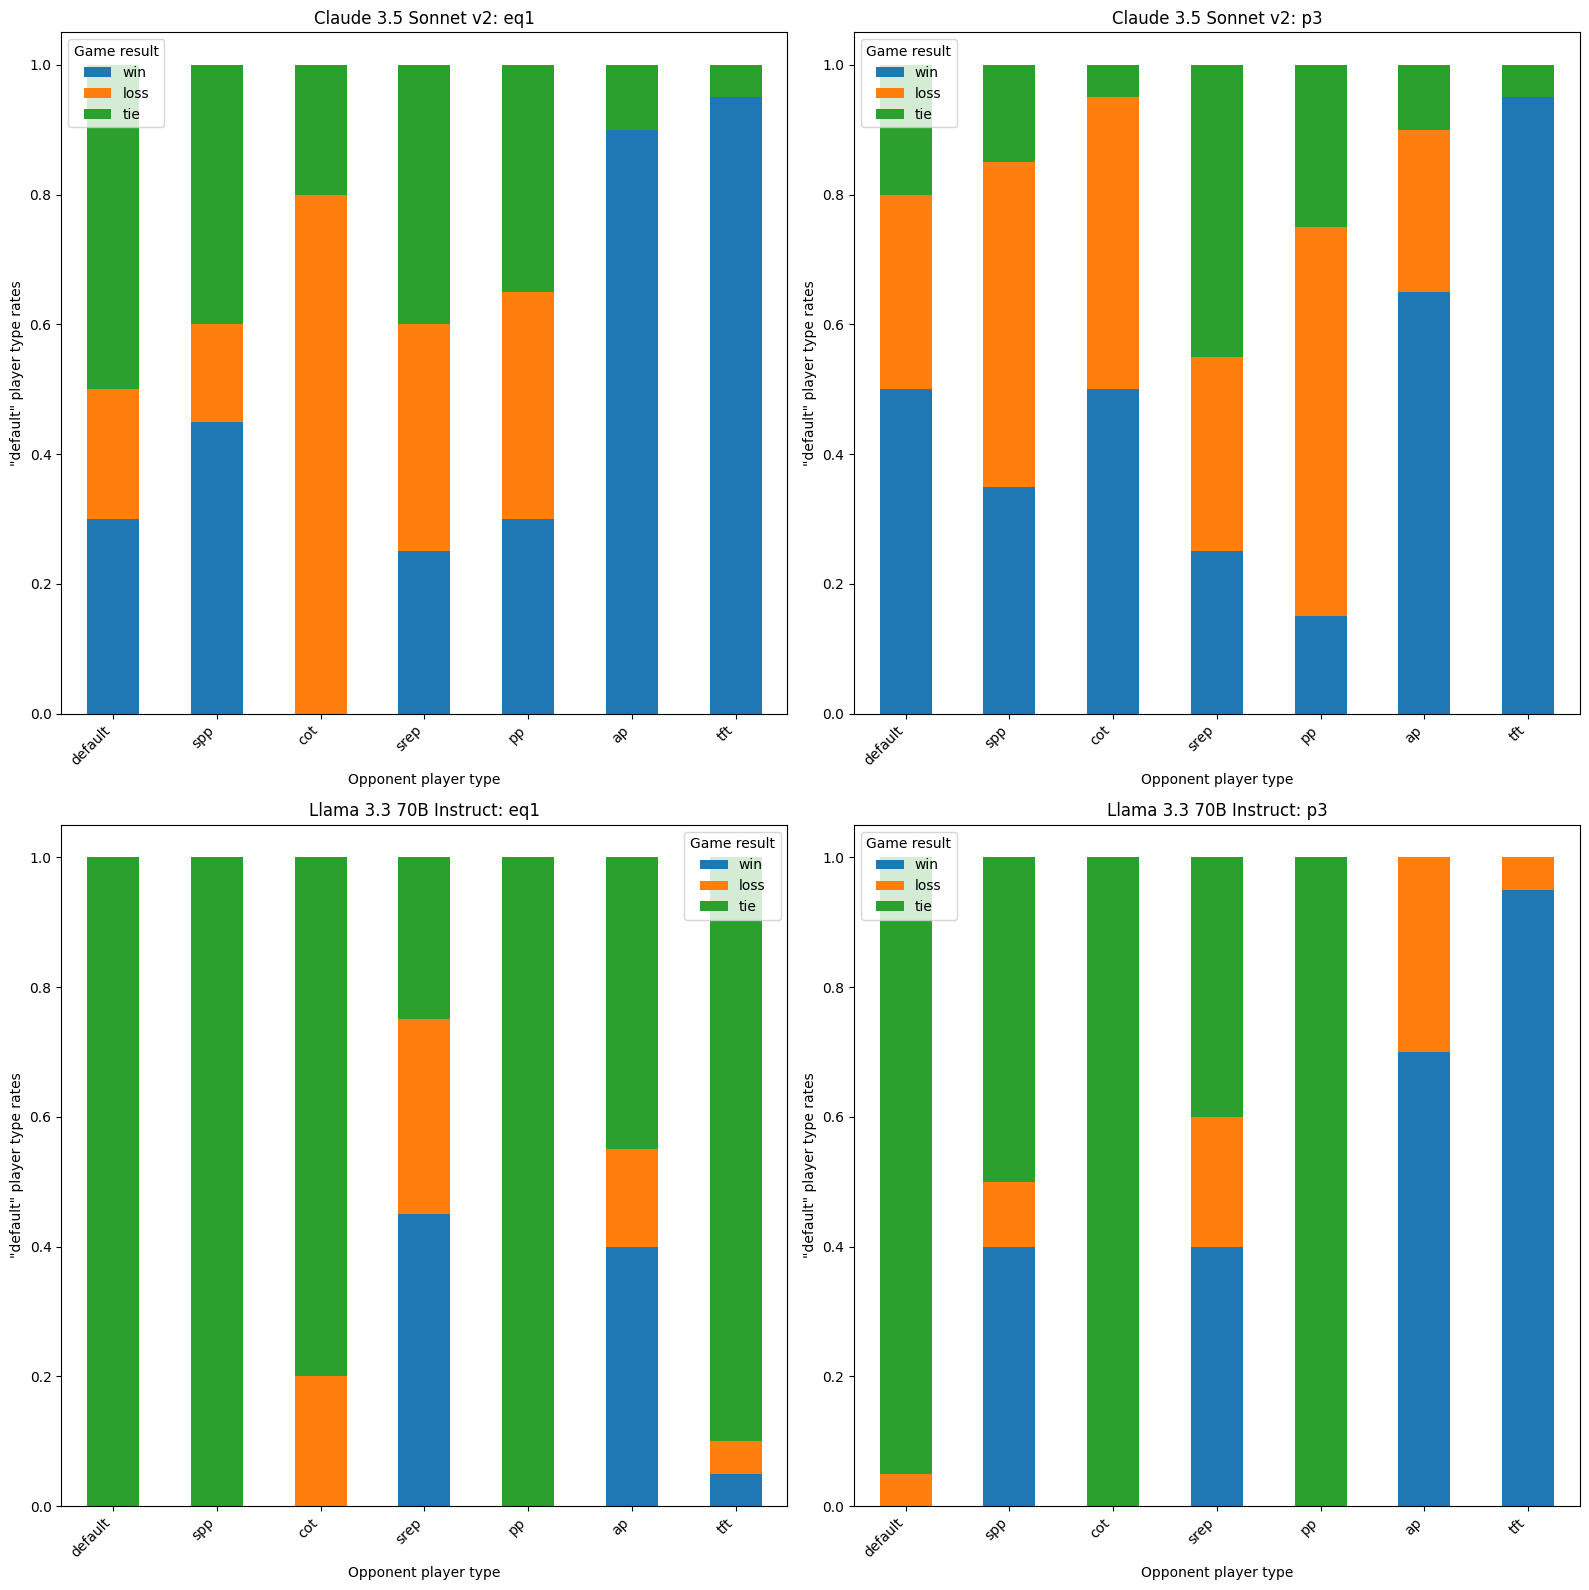

In [21]:
plot_group("default", "logs_tot")

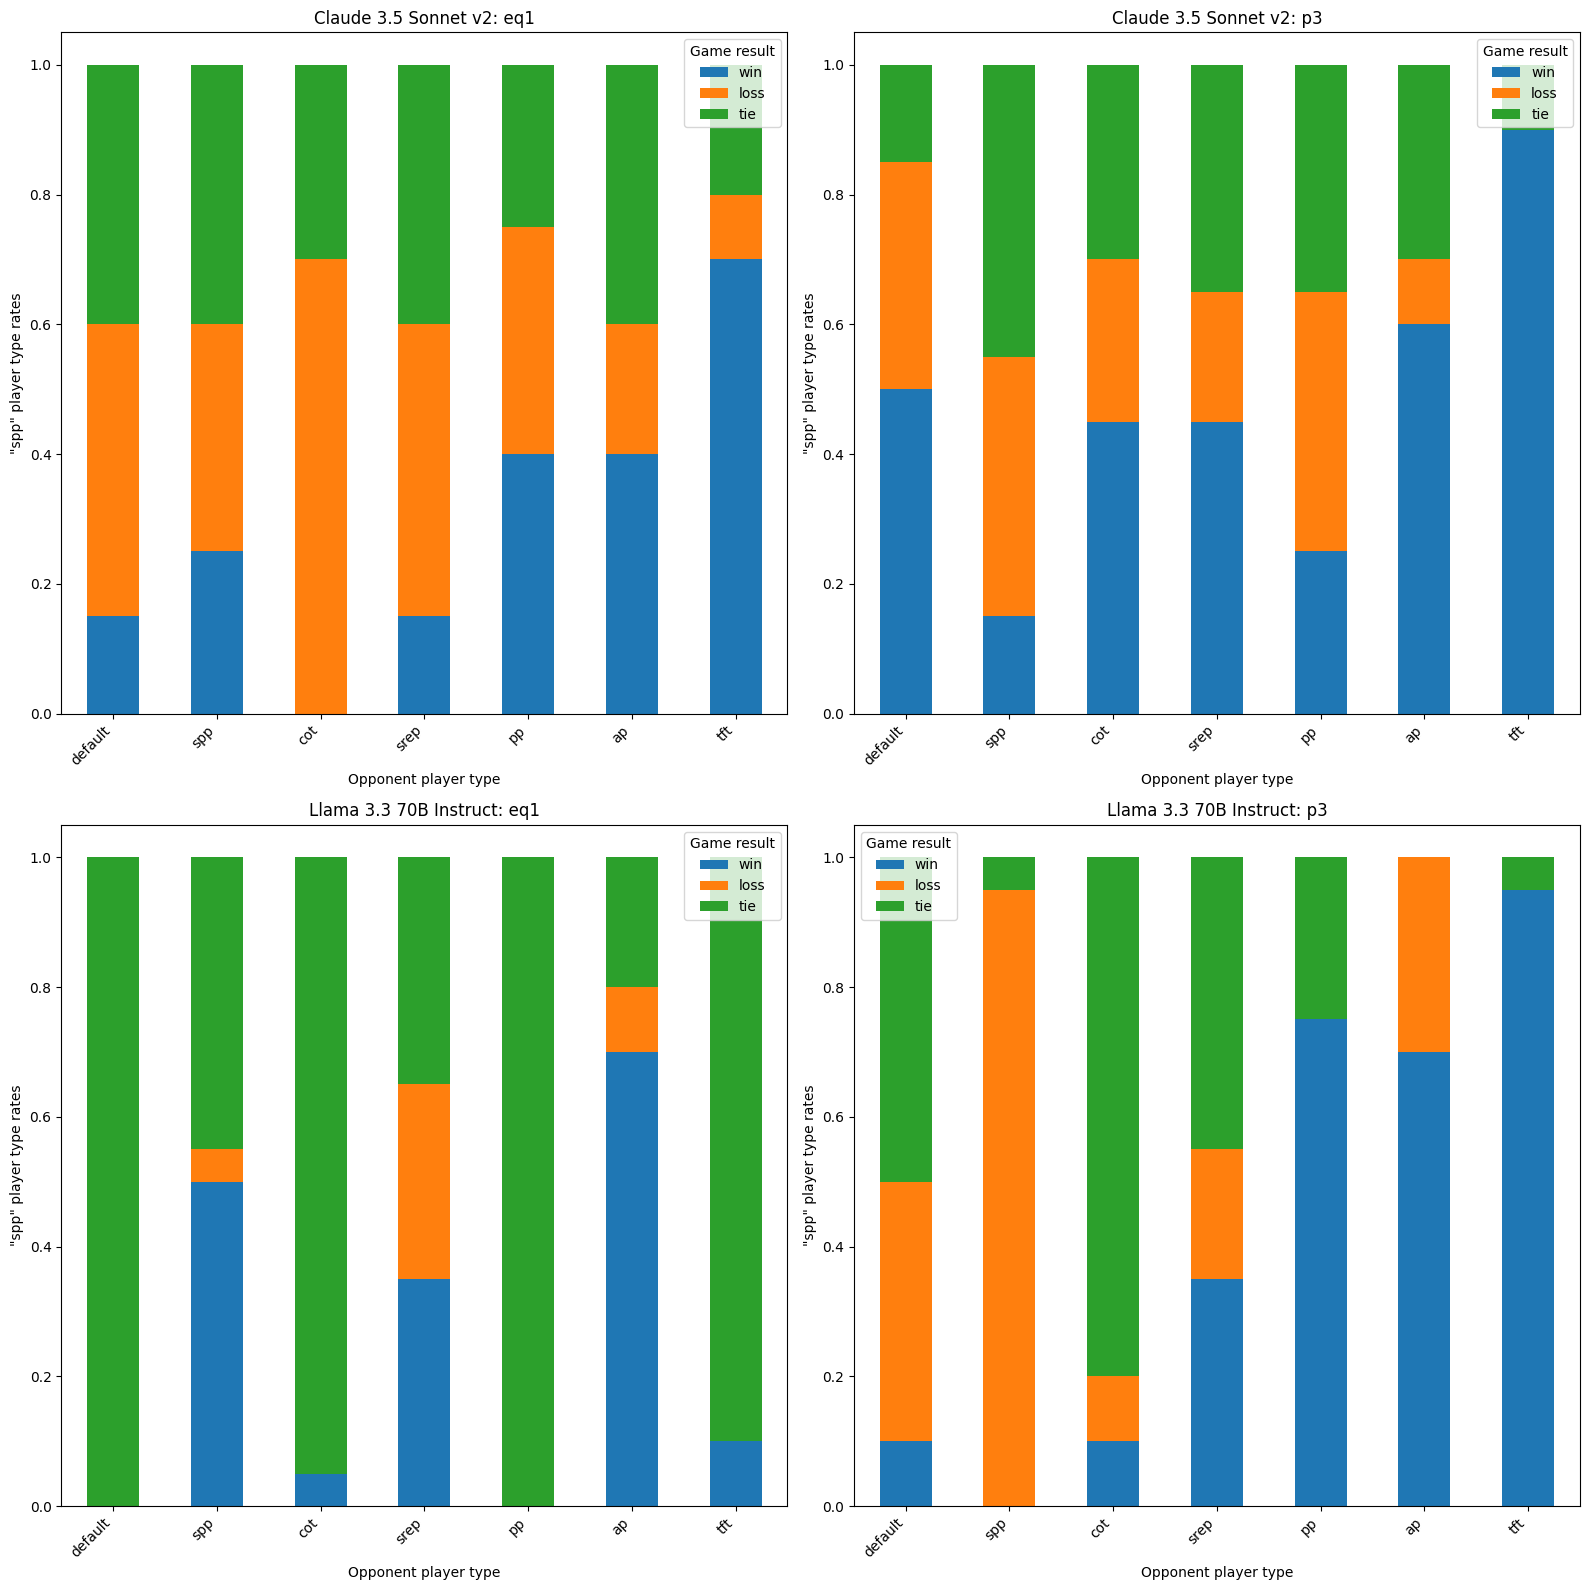

In [22]:
plot_group("spp", "logs_tot")

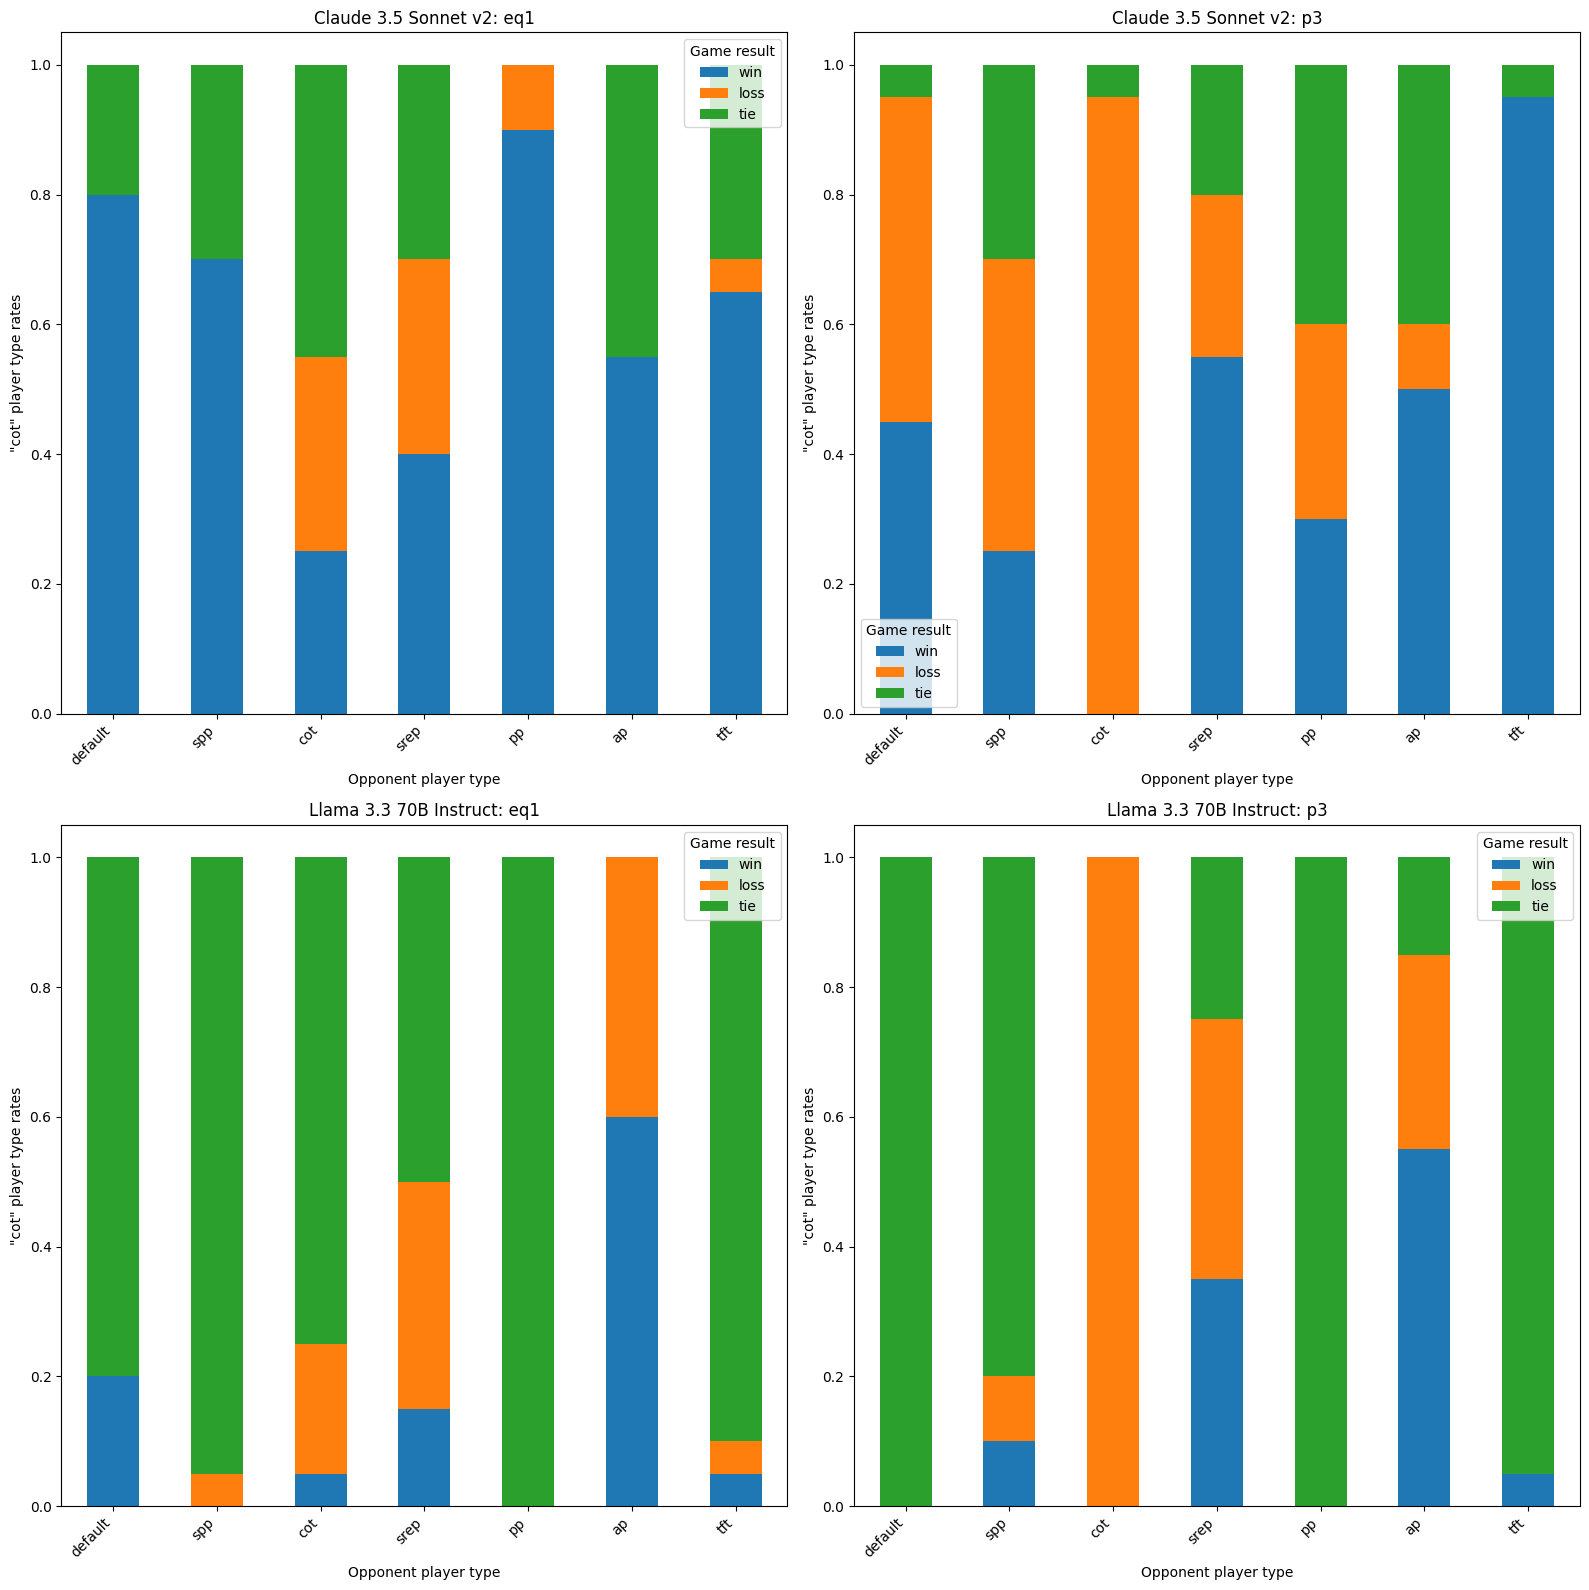

In [23]:
plot_group("cot", "logs_tot")